In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.shape

(100000, 9)

<Axes: xlabel='diabetes'>

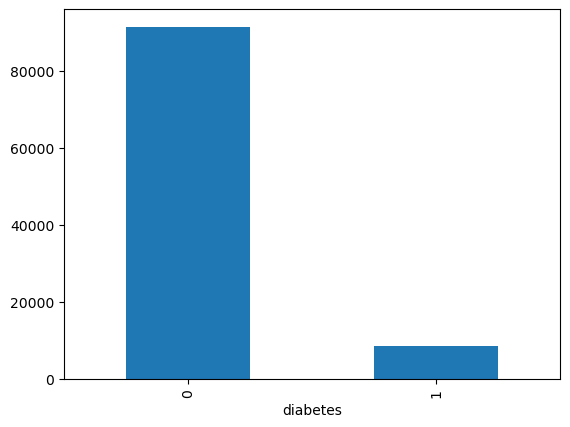

In [6]:
df['diabetes'].value_counts().plot(kind='bar')

In [7]:
corr = df.corr(numeric_only=True)
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<Axes: >

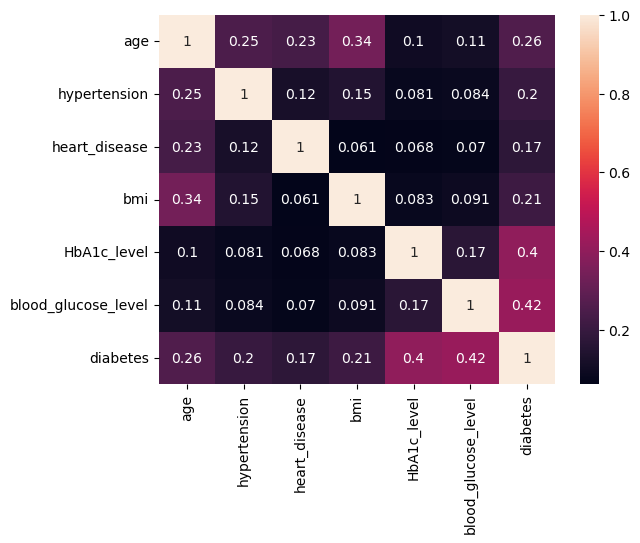

In [8]:
sns.heatmap(corr, annot=True)

# Data Cleaning 

In [9]:
df.sample(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
46112,Male,46.0,0,0,current,25.00,6.6,85,0
79895,Female,22.0,0,0,No Info,27.32,5.7,126,0
50594,Male,19.0,0,0,former,24.96,4.8,158,0


[]

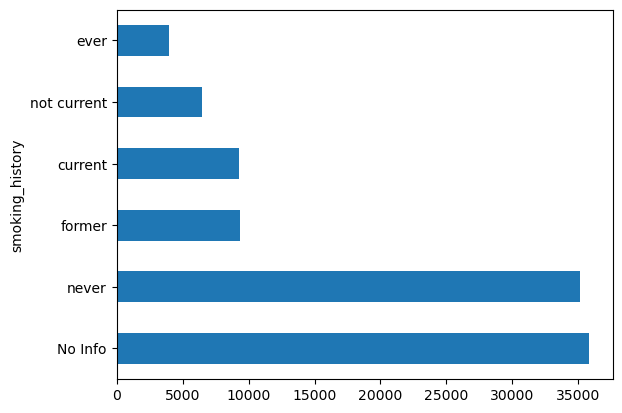

In [10]:
df['smoking_history'].value_counts().plot(kind='barh')
plt.plot()

Since our `smoking_history` has a lot of no_info which is of n imortance to the model training we will have to drop the whole column


In [11]:
df.drop(['smoking_history'], axis=1, inplace=True)

In [12]:
df.sample(3)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
26288,Male,53.0,0,0,27.60,4.5,140,0
53583,Male,32.0,0,0,30.24,5.0,160,0
882,Female,75.0,1,0,27.32,6.6,240,1


<Axes: xlabel='gender'>

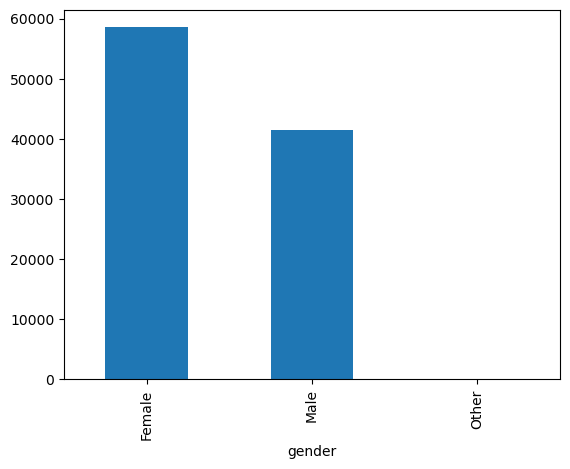

In [13]:
df['gender'].value_counts().plot(kind='bar')

In [14]:
df = df[df['gender'] != 'Other']

<Axes: xlabel='gender'>

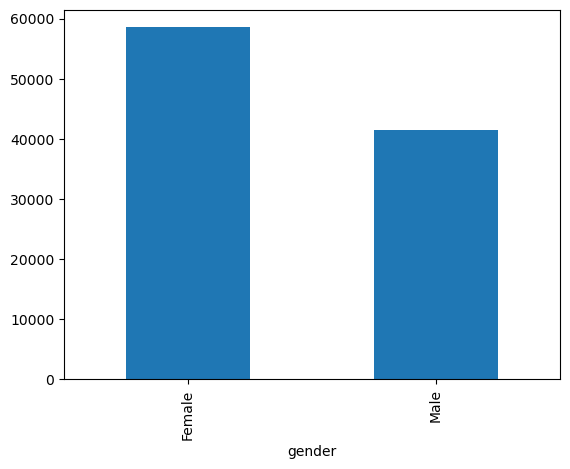

In [15]:
df['gender'].value_counts().plot(kind='bar')

In [16]:
df.shape

(99982, 8)

In [17]:
df.sample(3)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
35064,Female,26.0,0,0,47.27,6.6,160,0
91292,Female,35.0,0,0,21.88,4.0,130,0
99223,Female,43.0,0,0,34.47,5.7,200,1


<Axes: xlabel='0'>

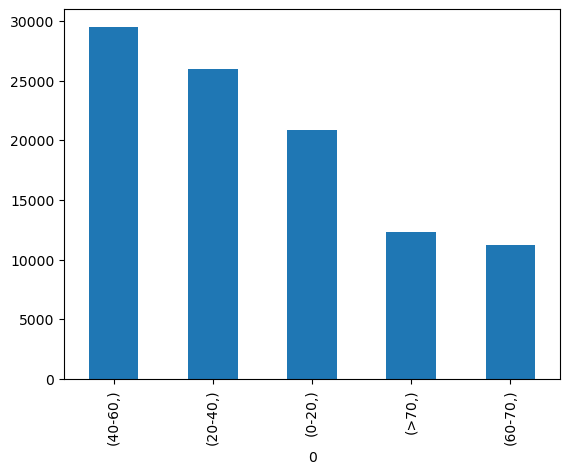

In [18]:
age_distribution = pd.cut(df['age'].values, bins=[0, 20, 40, 60, 70, np.inf], labels=['0-20', '20-40', '40-60', '60-70', '>70'])
age_distribution = age_distribution.astype('str')
pd.DataFrame(age_distribution).value_counts().plot(kind='bar')

<Axes: xlabel='diabetes', ylabel='age'>

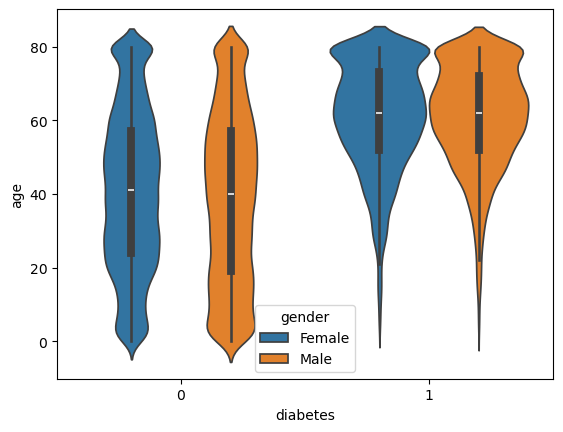

In [19]:
sns.violinplot(df, x='diabetes', y='age', hue='gender')

In [20]:
df.sample(3)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
91780,Female,28.0,0,0,43.01,6.2,145,0
20854,Male,45.0,0,0,27.32,5.7,80,0
12056,Female,56.0,0,1,37.49,9.0,300,1


In [21]:
df[['hypertension', 'heart_disease']]

,hypertension,heart_disease
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
99995,0,0
99996,0,0
99997,0,0
99998,0,0
